<a href="https://colab.research.google.com/github/sury53038/MyCodes/blob/main/iris_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
x,y = data.data, data.target

In [4]:
features = data.feature_names
print(features)
target_names = data.target_names
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
x = pd.DataFrame(x, columns=features)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y_frame = pd.DataFrame(y, columns=['target'])
y_frame.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
df = pd.concat([x,y_frame], axis =1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
x.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [11]:
x.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64


In [12]:
bin_edges = [0,1,2]
x_labels = target_names

[Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')]

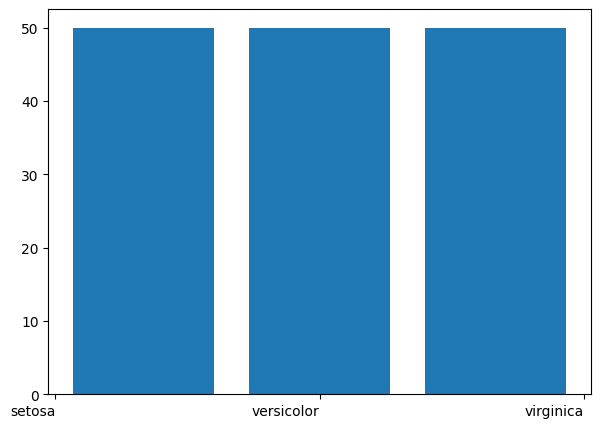

In [13]:
fig, ax = plt.subplots(figsize = (7,5))

y_frame['target'].hist(ax=ax, bins = 3, rwidth = 0.8, grid = False)

tick_positions = np.array(bin_edges)
ax.set_xticks(tick_positions)
ax.set_xticklabels(target_names, ha='right', fontsize=10)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

In [15]:
x_scaled = mms.fit_transform(x)

In [16]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 42, test_size = 0.3)

In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()

In [19]:
model.add(Dense(4, activation ='relu', input_shape = (4,)))
model.add(Dense(8, activation = 'sigmoid'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(4, activation = 'sigmoid'))
model.add(Dense(3, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 157 (628.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [22]:
model.compile(loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'], optimizer= 'Adam')

In [23]:
history = model.fit(x_train, y_train, batch_size= 16, epochs = 1000, validation_split = 0.2 )

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 0.4075 - loss: 1.0903 - val_accuracy: 0.3333 - val_loss: 1.0913
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3803 - loss: 1.0959 - val_accuracy: 0.3333 - val_loss: 1.0902
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3894 - loss: 1.0900 - val_accuracy: 0.3333 - val_loss: 1.0891
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3492 - loss: 1.1036 - val_accuracy: 0.3333 - val_loss: 1.0895
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3742 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0905
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3443 - loss: 1.1010 - val_accuracy: 0.3333 - val_loss: 1.0903
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3302 - loss: 1.1075 - val_accuracy: 0.3333 - val_loss: 1.0901
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3711 - loss: 1.0977 - val_accuracy: 0.3333 - 

In [24]:
model.add(Dense(4, activation ='relu', input_shape = (4,)))
model.add(Dense(8, activation = 'sigmoid'))
model.add(Dense(6, activation = 'sigmoid'))
# model.add(Dense(4, activation = 'sigmoid'))
model.add(Dense(3, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604 (2.36 KB)

 Trainable params: 288 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 316 (1.24 KB)

In [26]:
model.compile(loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'], optimizer= 'Adam')

In [27]:
history = model.fit(x_train, y_train, batch_size= 16, epochs = 1000, validation_split = 0.2 )

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step - accuracy: 0.3729 - loss: 1.1736 - val_accuracy: 0.4762 - val_loss: 1.0408
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3545 - loss: 1.1584 - val_accuracy: 0.4762 - val_loss: 1.0395
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3645 - loss: 1.1401 - val_accuracy: 0.4762 - val_loss: 1.0386
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3372 - loss: 1.1349 - val_accuracy: 0.4762 - val_loss: 1.0380
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3337 - loss: 1.1254 - val_accuracy: 0.4762 - val_loss: 1.0379
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3131 - loss: 1.1229 - val_accuracy: 0.4762 - val_loss: 1.0381
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3203 - loss: 1.1459 - val_accuracy: 0.4762 - val_loss: 1.0387
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3255 - loss: 1.1488 - val_accuracy: 0.4762 - 

In [38]:
#if one more hidden layer is added to the model, the model's accuracy goes from 95% to 97%

In [42]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step 


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [45]:
cm = confusion_matrix(y_pred_labels, y_test)

In [46]:
print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Text(0.5, 23.52222222222222, 'Predicted Label')

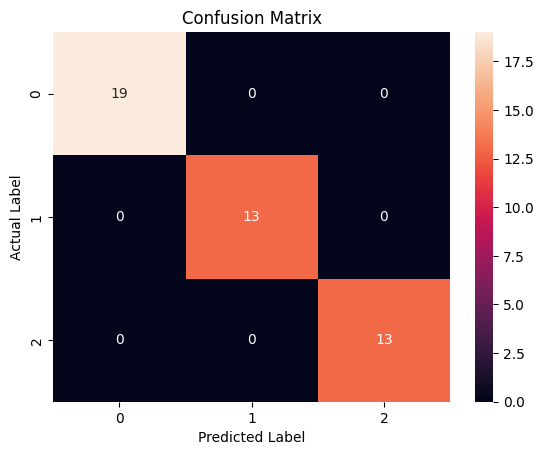

In [47]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [48]:
clf_rpt = classification_report(y_test, y_pred_labels, target_names = target_names)

In [49]:
print(clf_rpt)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/tmp/ipython-input-1353926771.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


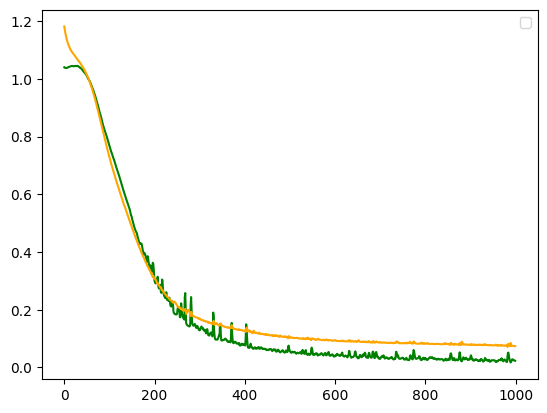

In [57]:
plt.plot(history.history['val_loss'], color = 'green')
plt.plot(history.history['loss'], color = 'orange')
plt.legend()
plt.show()